## Employee Satisfaction Survey Project
by Merveille Lore Kuendzong


### Introduction:
The Employee Satisfaction Survey dataset is derived from an annual survey conducted by the company's HR department, where employees voluntarily provide information about their job satisfaction and workplace experiences. This dataset includes key details such as employee identification numbers, self-reported satisfaction levels, performance evaluations, project involvement, work hours, tenure, work accidents, recent promotions, departmental affiliations, and salary levels.

Link to the dataset: https://www.kaggle.com/datasets/redpen12/employees-satisfaction-analysis

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
df = pd.read_csv("Employee Attrition.csv")
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


In [30]:
df.isnull().sum()

,0
Emp ID,788
satisfaction_level,788
last_evaluation,788
number_project,788
average_montly_hours,788
time_spend_company,788
Work_accident,788
promotion_last_5years,788
dept,788
salary,788


In [31]:
data = df.dropna()
data.isnull().sum()


,0
Emp ID,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
promotion_last_5years,0
dept,0
salary,0


In [32]:
data.shape

(14999, 10)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.3+ MB


In [34]:
data.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [35]:
# @title Number of employees who received a perfect evaluation score of 1
data[data['last_evaluation'] == 1]

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
8,9.0,0.89,1.0,5.0,224.0,5.0,0.0,0.0,sales,low
59,60.0,0.85,1.0,4.0,225.0,5.0,0.0,0.0,technical,low
91,92.0,0.89,1.0,5.0,246.0,5.0,0.0,0.0,sales,low
99,100.0,0.90,1.0,5.0,221.0,6.0,0.0,0.0,sales,medium
106,107.0,0.91,1.0,4.0,257.0,5.0,0.0,0.0,accounting,medium
...,...,...,...,...,...,...,...,...,...,...
15570,14783.0,0.73,1.0,4.0,252.0,5.0,0.0,0.0,technical,medium
15654,14867.0,0.77,1.0,4.0,232.0,5.0,0.0,0.0,technical,medium
15665,14878.0,0.84,1.0,5.0,242.0,5.0,0.0,0.0,sales,low
15684,14897.0,0.75,1.0,5.0,223.0,6.0,0.0,0.0,accounting,medium


283 employees received a perfect evaluation score of 1 during their last evaluation.




In [36]:
data.nunique()

,0
Emp ID,14999
satisfaction_level,92
last_evaluation,65
number_project,6
average_montly_hours,215
time_spend_company,8
Work_accident,2
promotion_last_5years,2
dept,10
salary,3


In [37]:
#@title List of all the departments
data['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [38]:
# @title Different salary categories
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

<ipython-input-39-6ec2031a4da8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(y="dept", x="count", data=sorted_data, palette="colorblind")


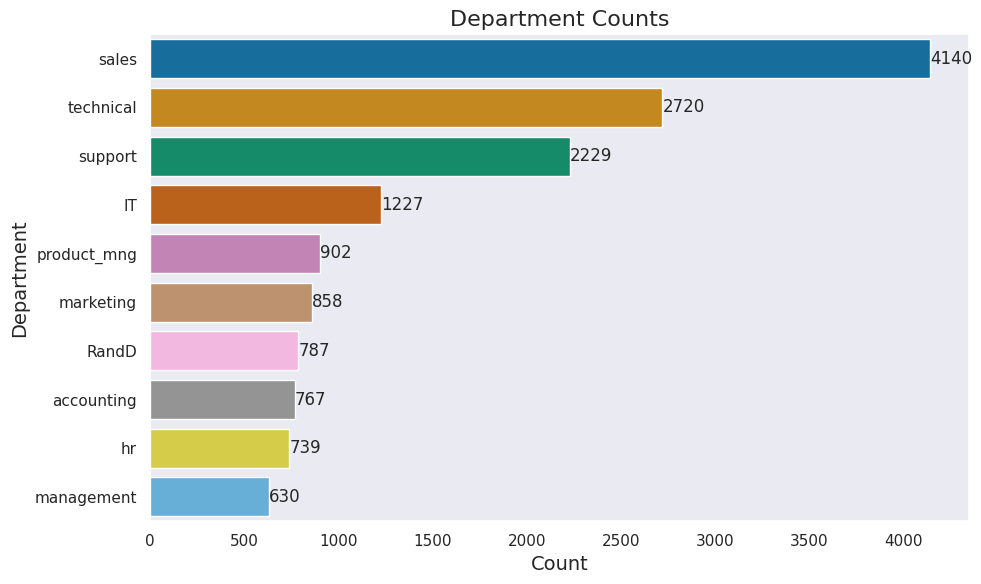

In [39]:
# @title Department Counts
sns.set_theme(style="dark")

# Compute counts and sort in descending order
sorted_data = data['dept'].value_counts().reset_index()
sorted_data.columns = ['dept', 'count']
sorted_data = sorted_data.sort_values('count', ascending=False)

# Create the plot
plt.figure(figsize=(10, 6))
plot = sns.barplot(y="dept", x="count", data=sorted_data, palette="colorblind")


# Add count labels
for i, row in sorted_data.iterrows():
    plt.text(row['count'], i, row['count'], ha='left', va='center')

# Add title and axis labels
plt.title("Department Counts", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Department", fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

The sales department has the greatest number of employees, followed by the technical, support, IT, product management, marketing, R&D (Research and Development), accounting, HR (Human Resources), and finally the management department, which has the fewest employees.

<ipython-input-40-41e55e0947a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="salary", palette="Blues_r")


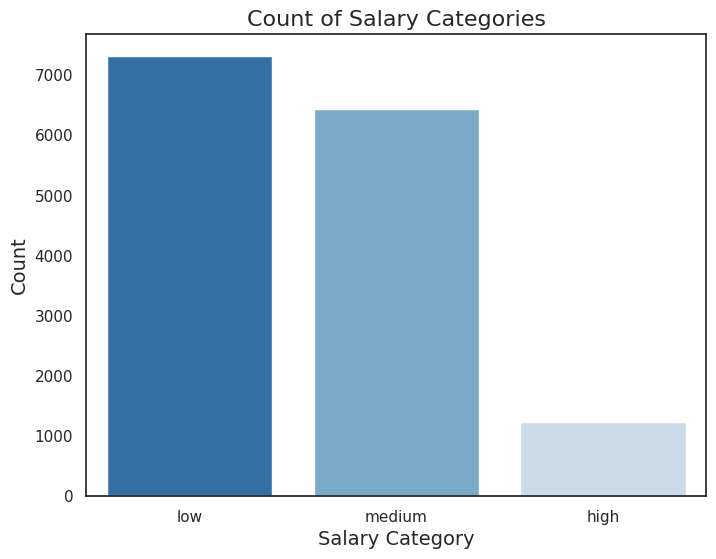

In [40]:
# @title Salary Category Counts
# Set the style
sns.set_style("white")

# Create a bar plot for salary category counts
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="salary", palette="Blues_r")

# Add title and labels
plt.title("Count of Salary Categories", fontsize=16)
plt.xlabel("Salary Category", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.show()

The employees with low salaries are the most numerous, followed by those with medium salaries, while employees with high salaries are the fewest.

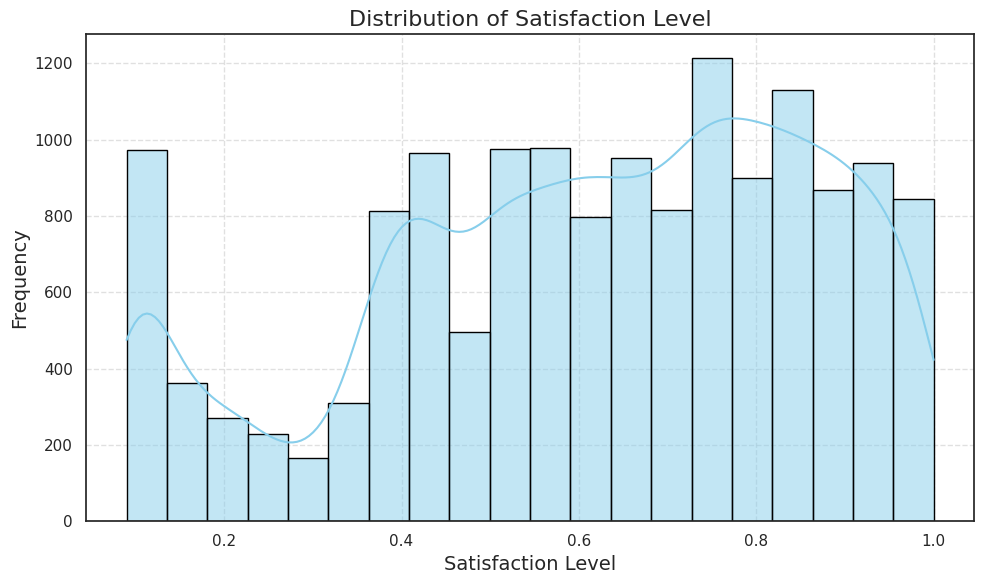

In [41]:
# @title Distribution of Satisfaction Level
sns.set_theme(style="white")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['satisfaction_level'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Add title and axis labels
plt.title('Distribution of Satisfaction Level', fontsize=16)
plt.xlabel('Satisfaction Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

The distribution of salary satisfaction is relatively consistent across the interval from 0.09 to 1, except for the intervals around 0.15 and 0.35, where the frequency is notably lower.

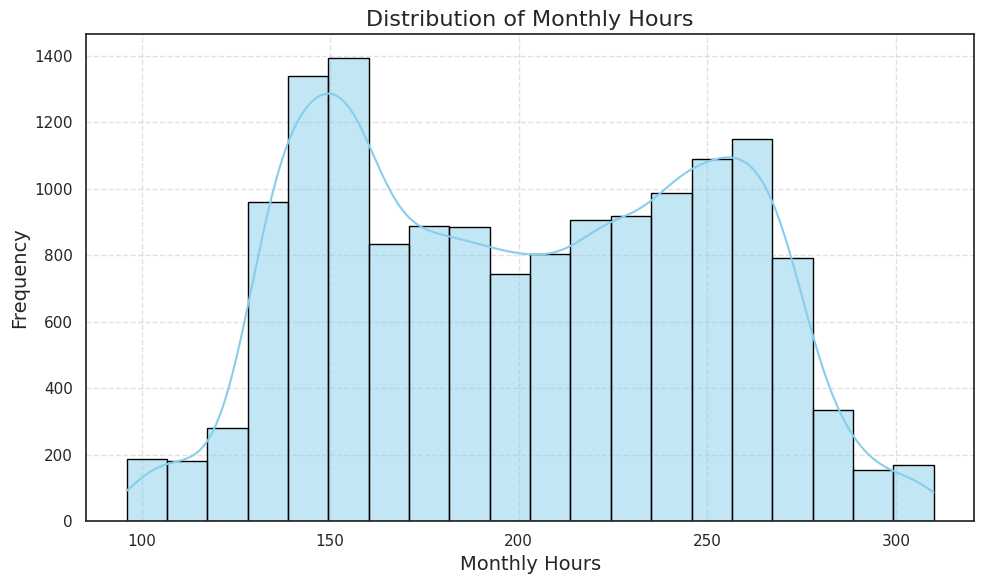

In [42]:
# @title Distribution of Monthly Hours

sns.set_theme(style="white")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['average_montly_hours'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Add title and axis labels
plt.title('Distribution of Monthly Hours', fontsize=16)
plt.xlabel('Monthly Hours', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

The histogram of monthly hours shows that many employees work around 150 hours or around 250 hours per month. However, there are relatively few employees working less than 140 hours or more than 260 hours a month.

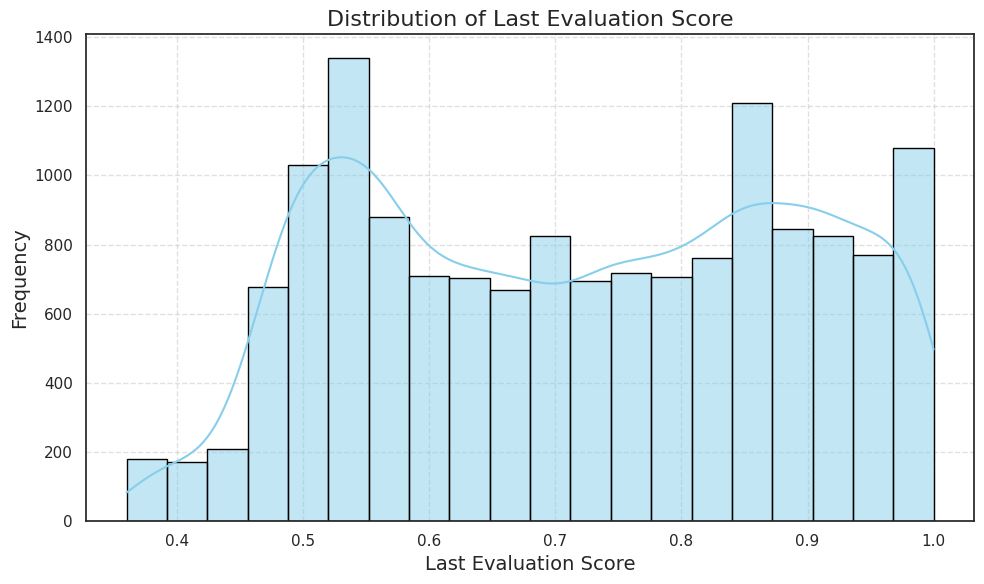

In [43]:
# @title Distribution of Last Evaluation Score

sns.set_theme(style="white")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['last_evaluation'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Add title and axis labels
plt.title('Distribution of Last Evaluation Score', fontsize=16)
plt.xlabel('Last Evaluation Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

The distribution of the last evaluation score shows that many employees have a score around 0.55, 0.85, and 1. Fewer employees have an evaluation score under 0.5.

<ipython-input-44-0a53609c2471>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot5 = sns.catplot(
<ipython-input-44-0a53609c2471>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
<ipython-input-44-0a53609c2471>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
<ipython-input-44-0a53609c2471>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)


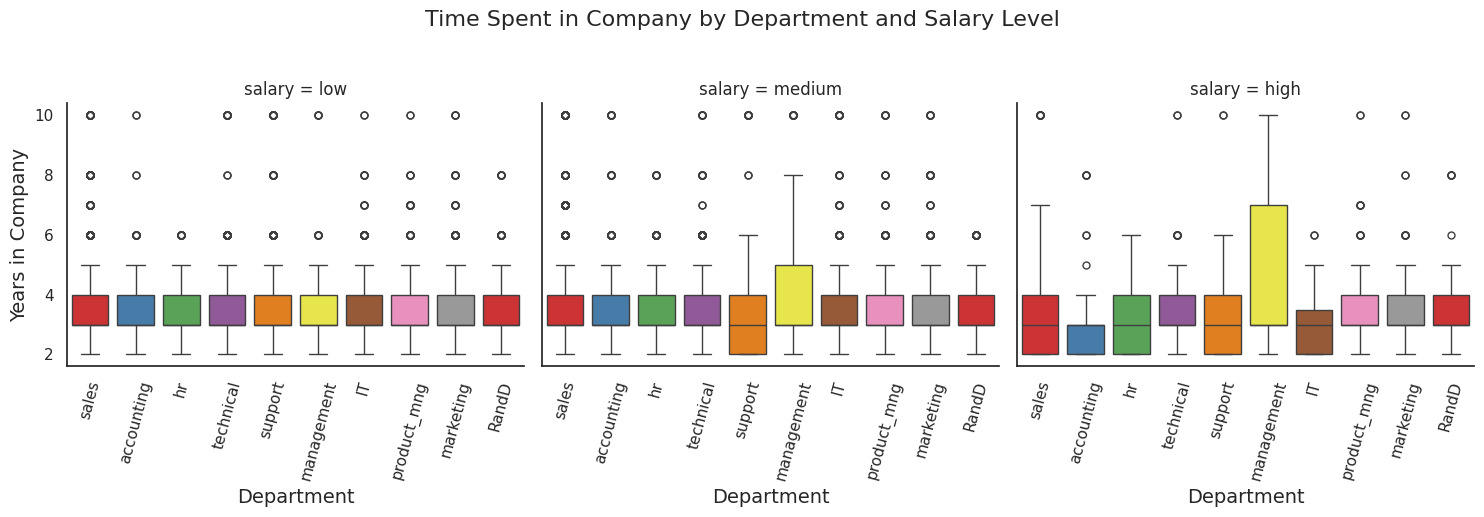

In [44]:
# @title Time Spent in Company by Department and Salary Level

# Create a box plots for each salary level
plot5 = sns.catplot(
    y="time_spend_company", x="dept",
    data=data, kind="box", col='salary',
    palette="Set1")

# Add title and labels
plot5.fig.suptitle("Time Spent in Company by Department and Salary Level", y=1.03, fontsize=16)
plot5.set_axis_labels("Department", "Years in Company", fontsize=14)

# Rotate x-tick labels for better readability
for ax in plot5.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In the low salary category, the majority of employees have been with the company for 3 or 4 years, with a few outliers who have spent significantly more time. In the medium salary category, most departments show a majority of employees with 3-4 years of tenure, with some outliers. The support department has employees who have worked for 2-4 years, with outliers and the median is 3, while the management department has employees with 3-5 years of tenure, also with outliers. For the high salary category, there is more variation in tenure, with the management department showing employees who have been with the company for 3-7 years.

<ipython-input-45-b5f396c8bfd3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot5 = sns.catplot(
<ipython-input-45-b5f396c8bfd3>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
<ipython-input-45-b5f396c8bfd3>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
<ipython-input-45-b5f396c8bfd3>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)


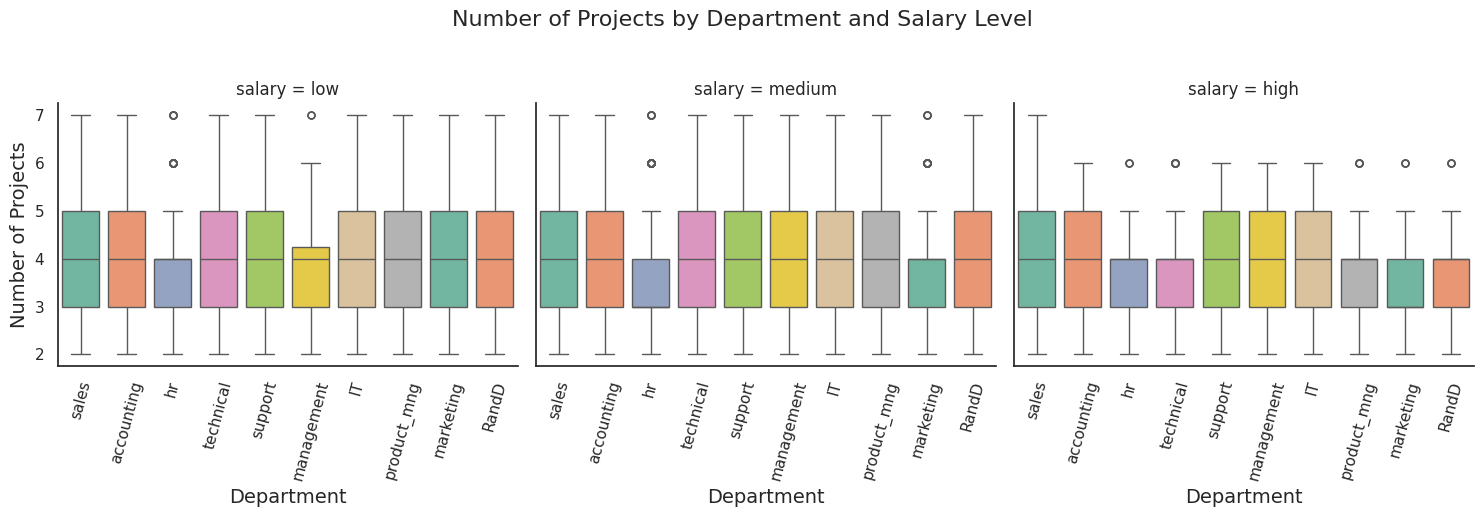

In [45]:
# @title Number of Projects by Department and Salary Level

# Create a box plots for each salary level
plot5 = sns.catplot(
    y="number_project", x="dept",
    data=data, kind="box", col='salary',
    palette="Set2")

# Add a descriptive title and labels
plot5.fig.suptitle("Number of Projects by Department and Salary Level", y=1.03, fontsize=16)
plot5.set_axis_labels("Department", "Number of Projects", fontsize=14)

# Rotate x-tick labels for better readability
for ax in plot5.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In the low salary category, the majority of employees across departments have between 3 and 5 projects, except for the HR and Management departments, which have fewer projects and some outliers. In the medium salary category, both HR and Marketing show lower project numbers with outliers. In the high salary category, departments such as HR, Technical, Product Management, Marketing, and R&D tend to have fewer projects. However, the median number of projects in most departments is typically around 4.

<ipython-input-46-7b4b12785f19>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot6 = sns.catplot(


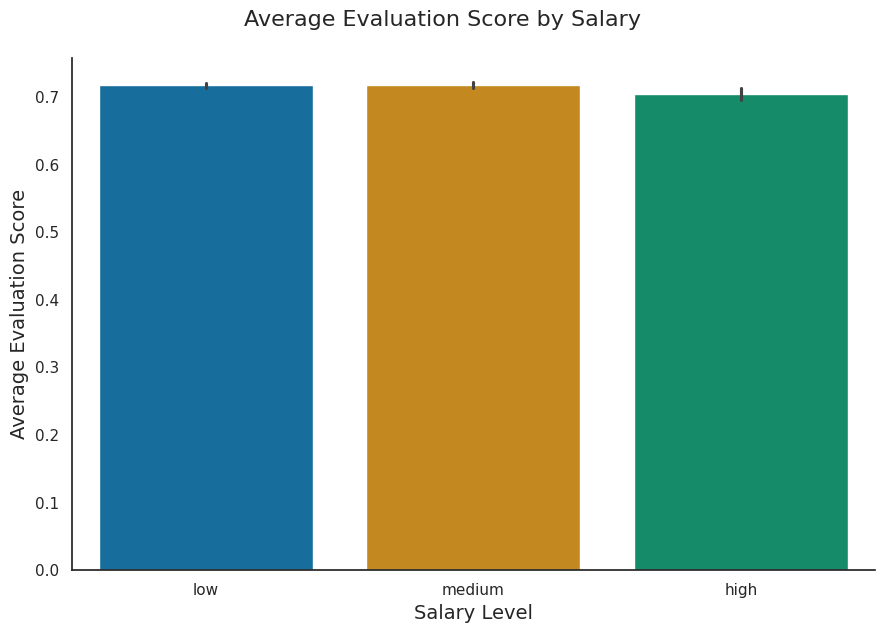

In [46]:
# @title Average Evaluation Score by Salary Level

# Create the bar plot of satisfaction level by salary
plot6 = sns.catplot(
    y="last_evaluation", x="salary",
    data=data, kind="bar",
    palette='colorblind', height=6, aspect=1.5
)

# Add title and axis labels
plot6.fig.suptitle("Average Evaluation Score by Salary", fontsize=16, y=1.05)
plot6.set_axis_labels("Salary Level", "Average Evaluation Score", fontsize=14)

# Show plot
plt.show()

The low and medium salary categories have an average last evaluation score of around 0.7, while the high salary category has a has a slightly lower last average evaluation score.

In [47]:
# @title Correlation between the number of projects and the last evaluation score
correlation = data[['number_project', 'last_evaluation']].corr().iloc[0, 1]
print(f"Correlation between the number of projects and the last evaluation score : {correlation}")

Correlation between the number of projects and the last evaluation score : 0.34933258851626237


The correlation of 0.349 between the number of projects and the last evaluation score indicates a weak positive relationship. This means that as the number of projects increases, the evaluation score tends to rise slightly, but the relationship is not strong enough to draw firm conclusions. Other factors likely influence the evaluation scores more significantly.

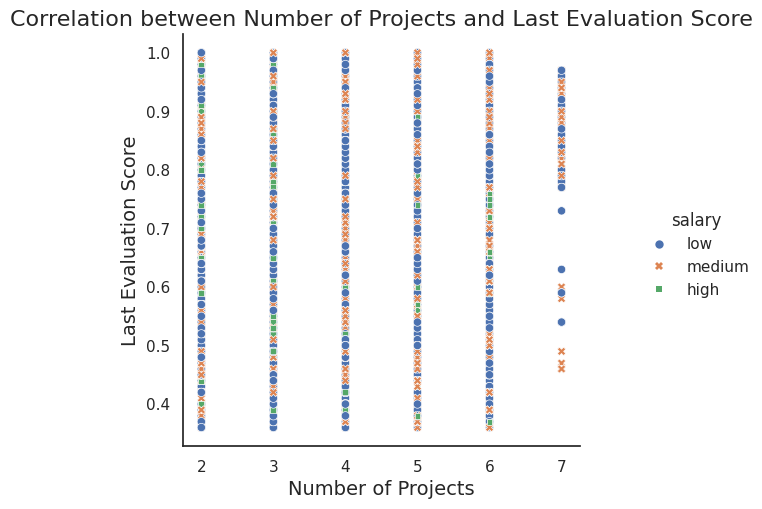

In [48]:
sns.relplot(x="number_project", y="last_evaluation",
                data=data, kind='scatter', hue = "salary", style ="salary")
# Add a title and axis labels
plt.title("Correlation between Number of Projects and Last Evaluation Score", fontsize=16)
plt.xlabel("Number of Projects", fontsize=14)
plt.ylabel("Last Evaluation Score", fontsize=14)

# Show plot
plt.show()

In [49]:
# @title Correlation Matrix
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Print correlation matrix
correlation_matrix

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Emp ID,1.000000,0.045841,-0.018168,-0.012124,-0.009850,0.144159,0.015931,0.088994
satisfaction_level,0.045841,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
last_evaluation,-0.018168,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
number_project,-0.012124,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
average_montly_hours,-0.009850,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
time_spend_company,0.144159,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
Work_accident,0.015931,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion_last_5years,0.088994,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


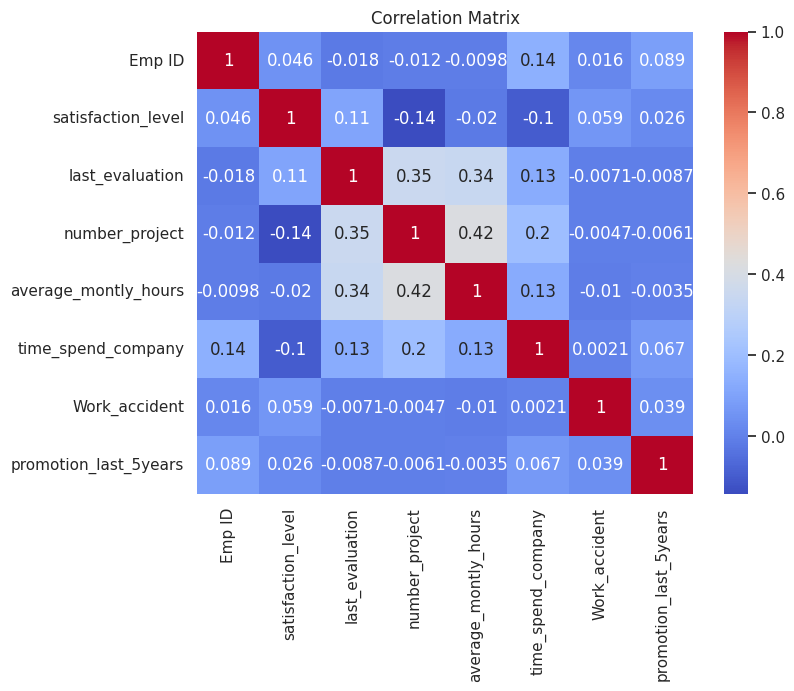

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [51]:
# @title Linear Regression Analysis

# Select predictors and target variable
X = data[['average_montly_hours', 'number_project']]
y = data['last_evaluation']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Linear regression model
model = LinearRegression()

model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r = model.score(X_test, y_test)

# average squared difference between the actual and predicted values.
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# proportion of variance in the target variable that is explained by the predictor variables in the model
print(f'R-squared: {r}')


Mean Squared Error: 0.024387105593246437
Root Mean Squared Error: 0.15616371407355306
R-squared: 0.18345092125667295


R-squared = 0.1834 suggests that approximately 18.34% of the variance in the target variable (last evaluation score) is explained by the predictors (number of projects and average monthly hours worked). This is relatively low, indicating that the model explains only a small portion of the variance in the target variable. To improve this score, adding more relevant predictors could potentially help capture a greater share of the variance.



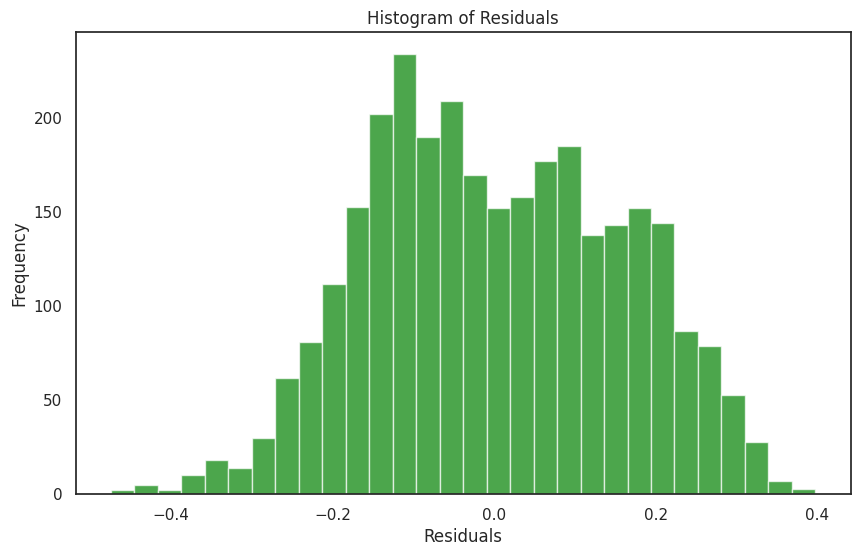

In [52]:
# @title Residual Analysis
residuals = y_test - y_pred

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color = 'green', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


The shape of the residuals appears to have non-symmetric patterns, indicating that the assumption of normally distributed errors may not be met. Therefore, the histogram of the residuals suggests that they do not follow a Gaussian distribution.

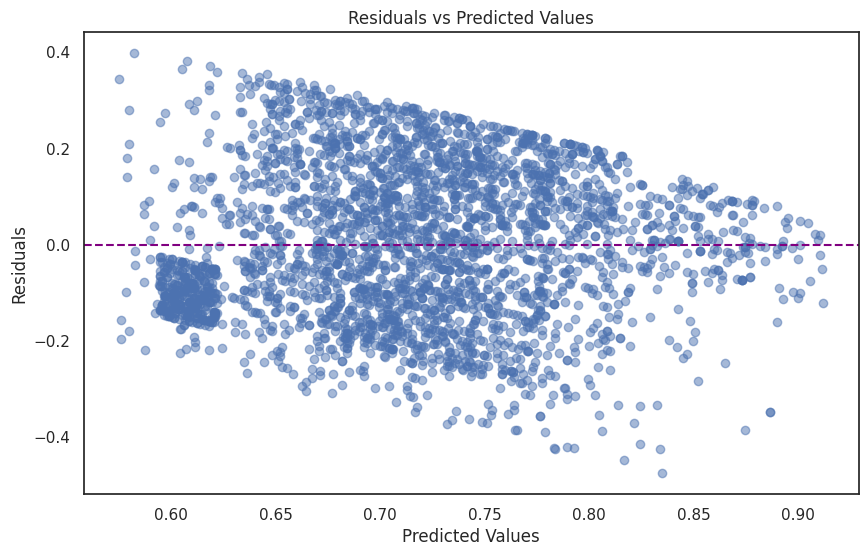

In [53]:
# Scatterplot of residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='purple', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


Based on the scatter plot of predicted values versus residuals, it appears that the residuals are spread evenly across all levels of the predicted values. This suggests that the assumption of homoscedasticity, which states that the variance of residuals should remain constant across all levels of the predicted values, is likely met.

In [54]:
# @title Interpreting Coefficients of the Model
coefficients = model.coef_
intercept = model.intercept_

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

# Create a DataFrame for coefficient interpretation
coef_df = pd.DataFrame(coefficients, index=['average_montly_hours', 'number_project'], columns=['Coefficient'])
coef_df


Intercept: 0.42522664860611814
Coefficients: [0.00079556 0.03432287]


,Coefficient
average_montly_hours,0.000796
number_project,0.034323


Intercept: 0.4252: This is the value of the target variable (last_evaluation) when both predictor variables (average_monthly_hours and number_project) are zero. While this might not be a realistic scenario (since having zero for these variables is unlikely), the intercept represents the baseline value of the target when all predictors are held constant at zero.

Coefficients:

average_monthly_hours: 0.00079: This means that for every 1-unit increase in average_monthly_hours, the last_evaluation score is expected to increase by approximately 0.00079, assuming the number of projects (number_project) remains constant.
number_project: 0.034323: This means that for every 1-unit increase in number_project, the last_evaluation score is expected to increase by approximately 0.0343, assuming the average monthly hours worked (average_monthly_hours) remains constant.

## Equation of the model:
last_evaluation = 0.4252 + 0.000796 × average_monthly_hours + 0.0343 × number_project